# APO

- 절대가격 오실레이터
- 가격의 특정 단기 이격을 포작하고자 이동평균을 기반으로 만든지표
- APO = 빠른 ema - 느린 ema
- 추세 형성 및 과매수/과매도 파악

In [2]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

In [3]:

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']


In [4]:
num_periods_fast = 10               # 빠른 EMA를 위한 기간
K_fast = 2 / (num_periods_fast + 1) # 빠른 EMA 평활화 팩터
ema_fast = 0
num_periods_slow = 40               # 느린 EMA를 위한 기간
K_slow = 2 / (num_periods_slow + 1) # 느린 EMA 평활화 팩터
ema_slow = 0

ema_fast_values = [] # 시각화를 위해 빠른 EMA값을 보유
ema_slow_values = [] # 시각화를 위해 느린 EMA값을 보유
apo_values = []      # 계산된 APO값을 추적
for close_price in close:
  if (ema_fast == 0):               # 첫 번째 관찰값
    ema_fast = close_price
    ema_slow = close_price
  else:
    ema_fast = (close_price - ema_fast) * K_fast + ema_fast
    ema_slow = (close_price - ema_slow) * K_slow + ema_slow

  ema_fast_values.append(ema_fast)
  ema_slow_values.append(ema_slow)
  apo_values.append(ema_fast - ema_slow)



In [5]:
goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=goog_data.index))
goog_data = goog_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=goog_data.index))
goog_data = goog_data.assign(AbsolutePriceOscillator=pd.Series(apo_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
ema_f = goog_data['FastExponential10DayMovingAverage']
ema_s = goog_data['SlowExponential40DayMovingAverage']
apo = goog_data['AbsolutePriceOscillator']


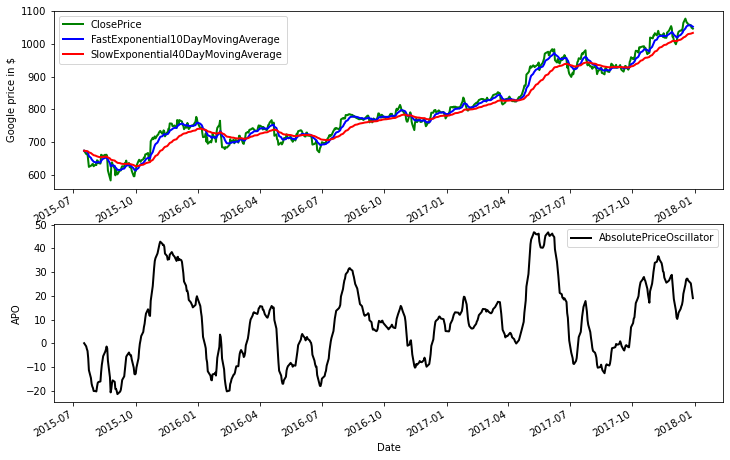

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='APO')
apo.plot(ax=ax2, color='black', lw=2., legend=True)
plt.show()